In [12]:
# Cell 1: Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [13]:
# Cell 2: Load the news data
news_df = pd.read_csv('../data/raw_analyst_ratings.csv')
print("📰 News Data Shape:", news_df.shape)
print("\nNews Data Columns:")
print(news_df.columns.tolist())

📰 News Data Shape: (1407328, 6)

News Data Columns:
['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']


In [14]:
# Cell 3: Display first few rows of news data
print("First 5 rows of News Data:")
news_df.head()

First 5 rows of News Data:


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [15]:
# Cell 4: Basic information about news data
print("📊 News Data Info:")
news_df.info()

📊 News Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [16]:
# Cell 5: Check for missing values in news data
print("🔍 Missing Values in News Data:")
missing_news = news_df.isnull().sum()
print(missing_news[missing_news > 0])

🔍 Missing Values in News Data:
Series([], dtype: int64)


In [17]:
# Cell 6: Descriptive Statistics for Text Data
print("📏 Headline Length Analysis:")
news_df['headline_length'] = news_df['headline'].str.len()
print("Headline Length Statistics:")
print(news_df['headline_length'].describe())

📏 Headline Length Analysis:
Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [18]:
# Cell 7: Articles per Publisher
print("🏢 Articles per Publisher:")
publisher_counts = news_df['publisher'].value_counts()
print("Top 10 Publishers:")
print(publisher_counts.head(10))

🏢 Articles per Publisher:
Top 10 Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


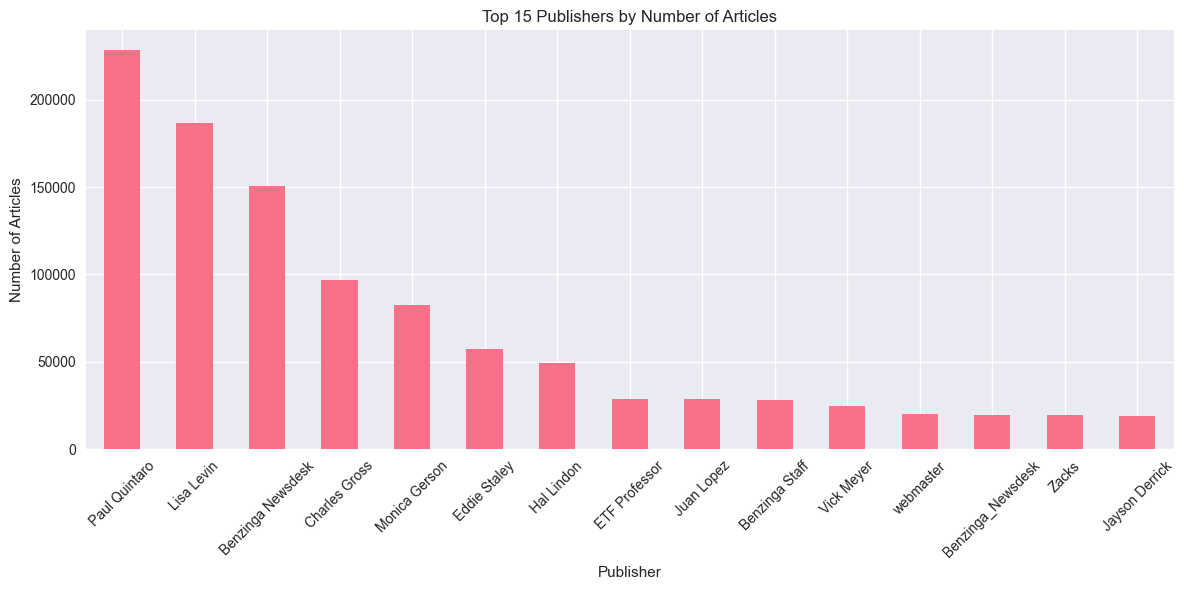

In [19]:
# Cell 8: Plot articles per publisher (Top 15)
plt.figure(figsize=(12, 6))
publisher_counts.head(15).plot(kind='bar')
plt.title('Top 15 Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
# Cell 9 (CORRECTED): Date analysis - dates are already in datetime format
print("📅 Publication Date Analysis:")

# The dates are already datetime objects, so we can use them directly
print("Date column is already datetime format:", news_df['date'].dtype)

# Create day and day_name columns
news_df['publication_date'] = news_df['date'].dt.date
news_df['publication_day'] = news_df['date'].dt.day_name()

print("Date range:", news_df['date'].min(), "to", news_df['date'].max())
print("Total number of articles:", len(news_df))

📅 Publication Date Analysis:
Date column is already datetime format: datetime64[ns, UTC]
Date range: 2011-04-28 01:01:48+00:00 to 2020-06-11 21:12:35+00:00
Total number of articles: 1407328


📈 Articles by Day of Week:
publication_day
Thursday     12712
Wednesday    11873
Tuesday      11037
Monday       10297
Friday        9407
Sunday         388
Saturday       273
Name: count, dtype: int64


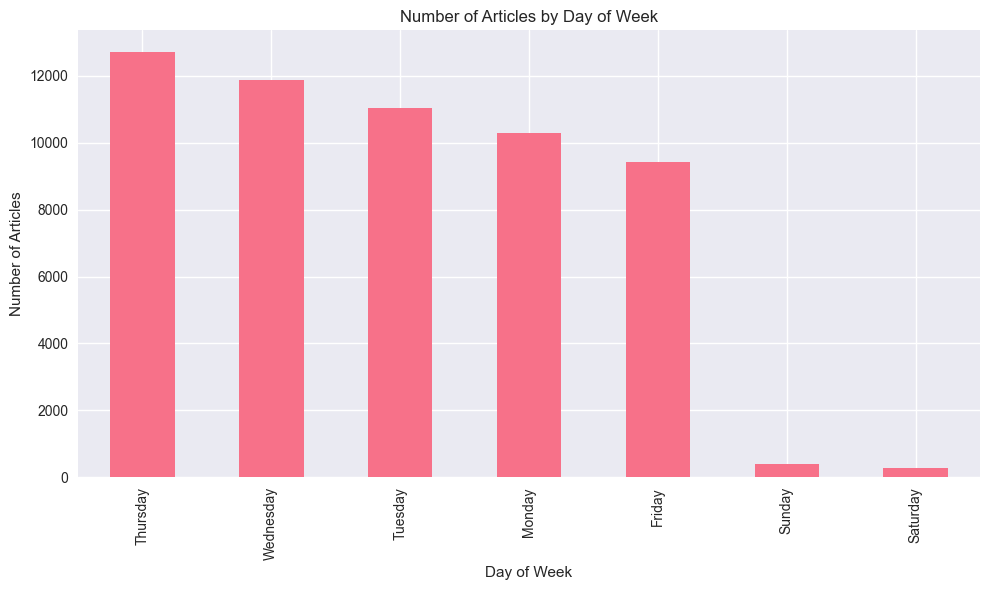

In [26]:
# Cell 10: Articles by day of week
print("📈 Articles by Day of Week:")
day_counts = news_df['publication_day'].value_counts()
print(day_counts)

plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar')
plt.title('Number of Articles by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()

🕒 Articles by Hour of Day:


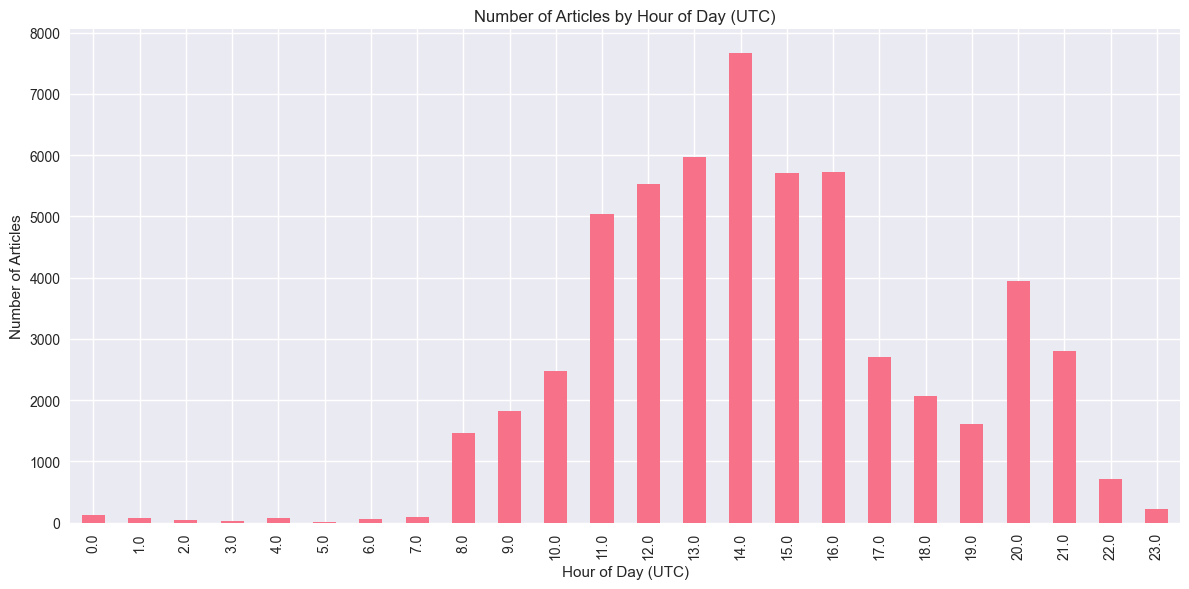

In [27]:
# Cell 11: Articles by hour of day
print("🕒 Articles by Hour of Day:")
news_df['publication_hour'] = news_df['date'].dt.hour
hour_counts = news_df['publication_hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
hour_counts.plot(kind='bar')
plt.title('Number of Articles by Hour of Day (UTC)')
plt.xlabel('Hour of Day (UTC)')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()

📈 Articles Over Time (Monthly):


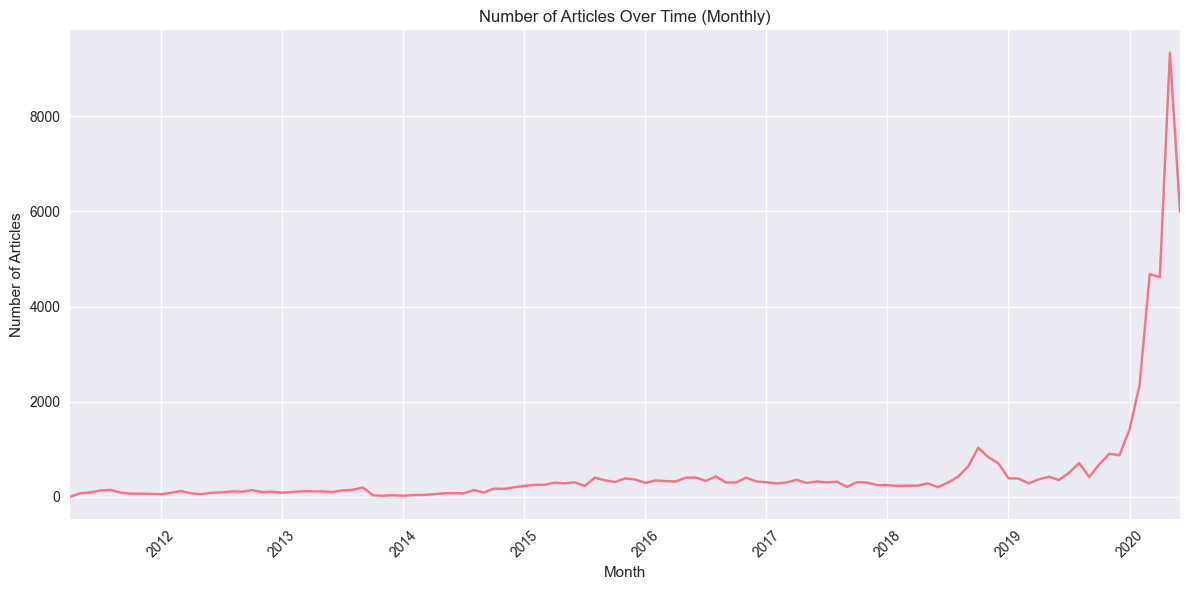

In [28]:
# Cell 12: Articles over time (monthly)
print("📈 Articles Over Time (Monthly):")
news_df['publication_month'] = news_df['date'].dt.to_period('M')
monthly_counts = news_df['publication_month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='line')
plt.title('Number of Articles Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
# Cell 13: Text Analysis - Common Keywords
print("🔤 Common Keywords in Headlines:")
from collections import Counter
import re

# Extract words from headlines
all_words = []
for headline in news_df['headline'].dropna():
    words = re.findall(r'\b[a-zA-Z]{4,}\b', str(headline).lower())  # Get words with 4+ letters
    all_words.extend(words)

# Get most common words
common_words = Counter(all_words).most_common(20)
print("Top 20 most common words in headlines:")
for word, count in common_words:
    print(f"{word}: {count}")

🔤 Common Keywords in Headlines:
Top 20 most common words in headlines:
stocks: 161776
from: 120805
market: 120558
shares: 114313
reports: 108710
update: 91723
earnings: 87399
with: 84257
sales: 79645
benzinga: 74516
week: 69572
announces: 66591
price: 64407
downgrades: 61959
trading: 61182
raises: 57802
upgrades: 56811
target: 54714
maintains: 52961
down: 50060


📊 Articles by Stock Symbol:
Top 10 Stock Symbols:
stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
NFLX    3028
M       3025
EBAY    3018
GILD    2968
VZ      2966
Name: count, dtype: int64


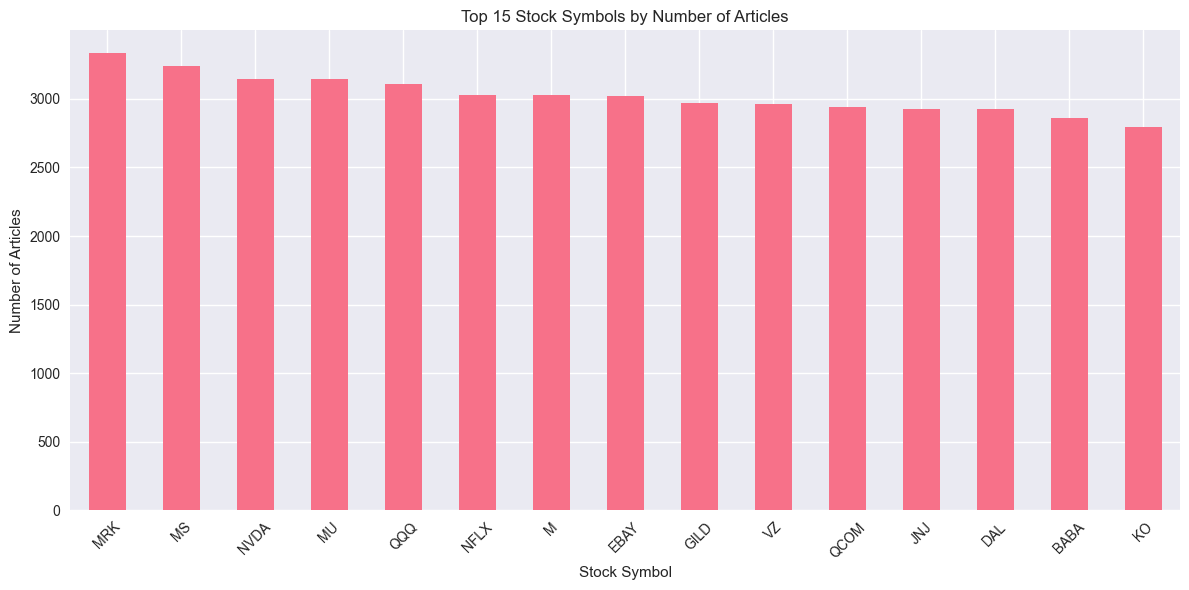

In [30]:
# Cell 14: Stock Symbol Analysis
print("📊 Articles by Stock Symbol:")
stock_counts = news_df['stock'].value_counts()
print("Top 10 Stock Symbols:")
print(stock_counts.head(10))

plt.figure(figsize=(12, 6))
stock_counts.head(15).plot(kind='bar')
plt.title('Top 15 Stock Symbols by Number of Articles')
plt.xlabel('Stock Symbol')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
# Cell 15: Summary Statistics
print("📋 EDA SUMMARY:")
print(f"Total articles: {len(news_df):,}")
print(f"Date range: {news_df['date'].min()} to {news_df['date'].max()}")
print(f"Unique publishers: {news_df['publisher'].nunique()}")
print(f"Unique stock symbols: {news_df['stock'].nunique()}")
print(f"Average headline length: {news_df['headline_length'].mean():.1f} characters")
print(f"Most active day: {news_df['publication_day'].mode().iloc[0]}")
print(f"Most covered stock: {stock_counts.index[0]} with {stock_counts.iloc[0]:,} articles")

📋 EDA SUMMARY:
Total articles: 1,407,328
Date range: 2011-04-28 01:01:48+00:00 to 2020-06-11 21:12:35+00:00
Unique publishers: 1034
Unique stock symbols: 6204
Average headline length: 73.1 characters
Most active day: Thursday
Most covered stock: MRK with 3,333 articles
